Hello, this notebook will visualize the apple data line spectrum

In [2]:
import pandas as pd # for importing data into data frame format
import seaborn as sns # For drawing useful graphs, such as bar graphs
from matplotlib.pyplot import show # This displays graphs once they have been created
import numpy as np
import matplotlib.pyplot as plt
from source.roc import draw_roc 


#### Read the data

In [3]:
df = pd.read_excel('/users/hussein/source/apple_classification/data/Detect-GS.xlsx')

#### Show the data

In [4]:
df.head(5)

Sample Condition Age Source  11995.49  11991.63  11987.78  \
0  GS-ch-bruise1h-10a         B  1h     S1 -0.113748 -0.113815 -0.114197   
1  GS-ch-bruise1h-10b         B  1h     S1 -0.161664 -0.161498 -0.161212   
2  GS-ch-bruise1h-10c         S  1h     S1 -0.139064 -0.138784 -0.138928   
3  GS-ch-bruise1h-10d         S  1h     S1 -0.143663 -0.143526 -0.143718   
4  GS-ch-bruise1h-11a         B  1h     S1 -0.166998 -0.166739 -0.166921   

   11983.92  11980.06  11976.21  ...  4034.497   4030.64  4026.783  4022.926  \
0 -0.114321 -0.114032 -0.113495  ...  0.845574  0.850478  0.849688  0.844572   
1 -0.161013 -0.160861 -0.160329  ...  0.428670  0.431408  0.433148  0.431059   
2 -0.138786 -0.138244 -0.137692  ...  0.809659  0.808975  0.806819  0.805404   
3 -0.143459 -0.142628 -0.142030  ...  0.682872  0.683971  0.688426  0.692536   
4 -0.166882 -0.166638 -0.166418  ...  0.520031  0.521815  0.520814  0.518175   

   4019.069  4015.211  4011.354  4007.497   4003.64  3999.783  
0  0.844248  0.849826  0.854541  0.849297  0.836767  0.830801  
1  0.426104  0.422003  0.420373  0.419252  0.419077  0.421115  
2  0.807540  0.810868  0.814169  0.812831  0.799328  0.783305  
3  0.690982  0.685393  0.679534  0.677676  0.682072  0.689607  
4  0.518827  0.523526  0.529133  0.532134  0.531992  0.529879  

[5 rows x 2078 columns]

#### Describe the data

In [5]:
df.describe() ## ?? dont know what is that, need to search it

11995.490   11991.630   11987.780   11983.920   11980.060   11976.210  \
count  503.000000  503.000000  503.000000  503.000000  503.000000  503.000000   
mean     0.049910    0.049850    0.049618    0.049534    0.049784    0.050085   
std      0.202625    0.202868    0.202911    0.202672    0.202365    0.202156   
min     -0.203214   -0.204135   -0.204600   -0.204321   -0.203490   -0.202862   
25%     -0.137471   -0.137960   -0.138406   -0.138300   -0.137657   -0.137079   
50%     -0.033927   -0.034741   -0.035053   -0.034655   -0.033894   -0.033236   
75%      0.278413    0.278846    0.278853    0.278601    0.278706    0.278652   
max      0.357804    0.358504    0.358284    0.357457    0.356633    0.356348   

        11972.350   11968.490   11964.640   11960.780  ...   4034.497   \
count  503.000000  503.000000  503.000000  503.000000  ...  503.000000   
mean     0.050277    0.050487    0.050684    0.050860  ...    0.953688   
std      0.202163    0.202326    0.202419    0.202352  ...    0.265127   
min     -0.202669   -0.202294   -0.201424   -0.200629  ...    0.207445   
25%     -0.136910   -0.136915   -0.136542   -0.136432  ...    0.733004   
50%     -0.033596   -0.033782   -0.033289   -0.032604  ...    0.971393   
75%      0.279257    0.279578    0.279745    0.279814  ...    1.143403   
max      0.356963    0.358013    0.358423    0.358175  ...    1.797160   

        4030.640    4026.783    4022.926    4019.069    4015.211    4011.354   \
count  503.000000  503.000000  503.000000  503.000000  503.000000  503.000000   
mean     0.953899    0.954395    0.955090    0.955466    0.955572    0.955576   
std      0.265333    0.265282    0.265909    0.267495    0.268800    0.268934   
min      0.205000    0.203827    0.202555    0.202249    0.204336    0.204953   
25%      0.729669    0.728299    0.732041    0.730573    0.727860    0.730403   
50%      0.970280    0.967099    0.967474    0.968984    0.968003    0.971745   
75%      1.141374    1.141840    1.145913    1.147040    1.148342    1.149887   
max      1.785704    1.784596    1.789977    1.789419    1.803409    1.849301   

        4007.497    4003.640    3999.783   
count  503.000000  503.000000  503.000000  
mean     0.954911    0.953388    0.952374  
std      0.268198    0.266033    0.263822  
min      0.201574    0.201073    0.205487  
25%      0.729599    0.733538    0.731564  
50%      0.972103    0.967110    0.961193  
75%      1.151592    1.145465    1.144452  
max      1.931849    1.941492    1.906978  

[8 rows x 2074 columns]

#### Data shape

In [6]:
df.shape

(503, 2078)

#### Check for -NAN values

In [7]:
df.isnull().values.any()

False

#### Class freq

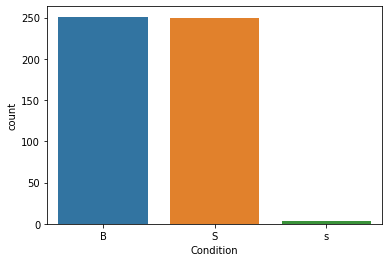

In [8]:
ax = sns.countplot(x="Condition",data=df)


we can see that there are 3 classes, it should have been only 2. we will make the lower case S to upper case

In [9]:
df['Condition'] = df['Condition'].str.upper()

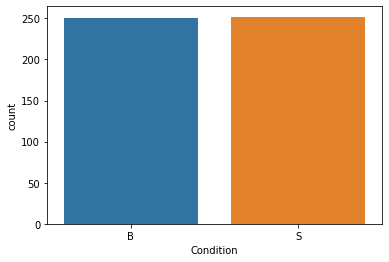

In [10]:
ax = sns.countplot(x="Condition",data=df)


Fixed !

---

#### draw a line spectrum

In [11]:
df_input= df.drop(['Sample', 'Condition', 'Age', 'Source'], axis=1)
df_input_log =  np.log(df_input+1)
df_input_sqrt =  np.sqrt(df_input+1)

In [12]:
print(df_input.head(2))


   11995.490  11991.630  11987.780  11983.920  11980.060  11976.210  \
0  -0.113748  -0.113815  -0.114197  -0.114321  -0.114032  -0.113495   
1  -0.161664  -0.161498  -0.161212  -0.161013  -0.160861  -0.160329   

   11972.350  11968.490  11964.640  11960.780  ...  4034.497   4030.640   \
0  -0.113074  -0.113266  -0.114108  -0.114498  ...   0.845574   0.850478   
1  -0.159698  -0.159639  -0.160184  -0.160504  ...   0.428670   0.431408   

   4026.783   4022.926   4019.069   4015.211   4011.354   4007.497   \
0   0.849688   0.844572   0.844248   0.849826   0.854541   0.849297   
1   0.433148   0.431059   0.426104   0.422003   0.420373   0.419252   

   4003.640   3999.783   
0   0.836767   0.830801  
1   0.419077   0.421115  

[2 rows x 2074 columns]


In [13]:
df_input_log.head(2)

11995.490  11991.630  11987.780  11983.920  11980.060  11976.210  \
0  -0.120754  -0.120830  -0.121260   -0.12140  -0.121075  -0.120469   
1  -0.176336  -0.176138  -0.175798   -0.17556  -0.175379  -0.174745   

   11972.350  11968.490  11964.640  11960.780  ...  4034.497   4030.640   \
0  -0.119994  -0.120210  -0.121161  -0.121600  ...   0.612791   0.615444   
1  -0.173994  -0.173924  -0.174572  -0.174953  ...   0.356744   0.358659   

   4026.783   4022.926   4019.069   4015.211   4011.354   4007.497   \
0   0.615017   0.612247   0.612072   0.615091   0.617637   0.614806   
1   0.359873   0.358414   0.354946   0.352066   0.350920   0.350130   

   4003.640   3999.783   
0   0.608007   0.604753  
1   0.350007   0.351442  

[2 rows x 2074 columns]

In [14]:
line_spec0 = np.array(df_input.iloc[0]).flatten()
# line_spec0 = line_spec0/df_input.iloc[0].max()

In [15]:
print(line_spec0)

[-0.1137478 -0.1138151 -0.1141967 ...  0.8492969  0.8367675  0.8308007]


In [16]:
len(line_spec0)

2074

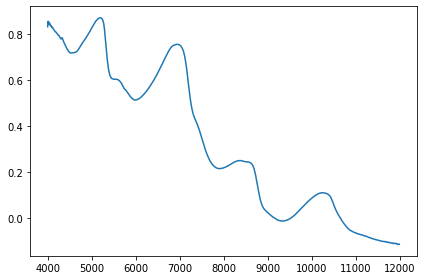

In [17]:
plt.plot(np.array(df_input.columns), line_spec0)
plt.tight_layout()  # a standard option for matplotlib

# add the col names, this might make more sense, and make it vertical (in case the names are big)

In [18]:
target = np.array(df['Condition'])
rand  = np.random.randint(len(target), size= 200)
rand

array([450, 326, 123, 234, 265, 117, 341,  57, 494, 444, 475, 389,  73,
       100,  79, 196, 379, 121, 114, 467, 271, 148, 100, 498, 215, 316,
       379, 294,  72, 407, 247, 154, 339,   0, 370,  88, 205, 121, 251,
       416, 223, 316, 157, 474, 496,  77,  41,  83,  73, 194, 479, 144,
       241, 416, 115, 417,  76,  26,  52, 194, 116, 244, 272, 322, 198,
       410, 136, 388, 472, 437, 360, 451,  94, 489, 290, 311, 136, 273,
       218, 469, 235, 470, 213, 494,  80, 209,  79, 390,  87, 235, 207,
       343, 409, 410, 344, 397, 248,  57, 240, 122, 122, 393, 216, 359,
        91, 228, 238, 323, 501, 500, 165, 368, 320, 228, 354, 492,  47,
       273,  50, 166, 371, 244, 100, 113, 338, 437, 453, 157, 253, 379,
       180, 322, 425, 142, 267, 140, 166, 352,  99,  89, 371, 213, 224,
       428, 445, 255, 401,   3, 268,  81, 392, 412, 140,  99, 431, 319,
        18, 168, 483, 213,  53, 131,  91, 393,  71, 240, 395, 186, 294,
       447, 489,  32, 199, 296, 426,  56, 129, 174, 370, 412, 47

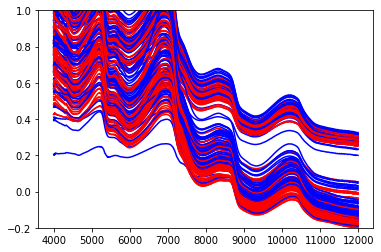

In [19]:

for t in range (200):
    i = rand[t]
    lineSpec =  np.array(df_input.iloc[i]).flatten()
    if target[i] == 'S':
        plt.plot(np.array(df_input.columns), lineSpec, color = 'red')
    if target[i] == 'B':
        plt.plot(np.array(df_input.columns), lineSpec, color = 'blue')
    plt.ylim(-.2, 1)
plt.show()

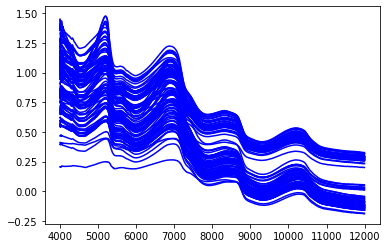

In [20]:

for t in range (200):
    i = rand[t]
    lineSpec =  np.array(df_input.iloc[i]).flatten()
    # if target[i] == 'S':
    #     plt.plot(np.array(df_input.columns), lineSpec, color = 'red')
    if target[i] == 'B':
        plt.plot(np.array(df_input.columns), lineSpec, color = 'blue')
    # plt.ylim(-.2, 1)
plt.show()

The above images are bad, a chmist need some peeks

---

In [321]:
from scipy.stats import linregress
result_df = pd.DataFrame(df_input.apply(lambda x: linregress(x, df_input.columns))).reset_index()


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 503 and the array at index 1 has size 2074

### adding features

In [21]:
# df['Condition'] = df['Condition'].str.replace('S',"red")
# df['Condition'] = df['Condition'].str.replace('B',"yellow")

y = df['Condition'].replace({'S': 1, 'B': 0})

In [22]:
print(df['Condition'] )

0      B
1      B
2      S
3      S
4      B
      ..
498    S
499    S
500    B
501    S
502    S
Name: Condition, Length: 503, dtype: object


In [23]:
df_inputEng = pd.DataFrame() # define a new dataframe
df_inputEng['mean'] = df_input.mean(axis=1)
df_inputEng['sd'] = df_input.std(axis=1)
df_inputEng['skew'] = df_input.skew(axis=1)
df_inputEng['median'] = df_input.median(axis=1)
df_inputEng['kurt'] = df_input.kurt(axis=1)
df_inputEng['max'] = df_input.max(axis=1)


Q1 = df_input.quantile(0.25, 1) # try the quantiles as features
Q3 = df_input.quantile(0.75,1 )
df_inputEng['iqr'] = Q3 - Q1


df_inputEng['class'] = df['Condition']






In [24]:
arr = np.arange(1,20)
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [25]:
print(arr[::3])

[ 1  4  7 10 13 16 19]


In [26]:
print(df_inputEng)

         mean        sd      skew    median      kurt       max       iqr  \
0    0.329351  0.327141  0.193897  0.244129 -1.498364  0.869968  0.628092   
1    0.164782  0.214739 -0.042697  0.142365 -1.559300  0.472133  0.434993   
2    0.286930  0.330099  0.276305  0.178668 -1.486507  0.846693  0.635710   
3    0.246410  0.289399  0.190297  0.167610 -1.532052  0.717865  0.568523   
4    0.163712  0.239448  0.164445  0.104743 -1.513590  0.562841  0.469862   
..        ...       ...       ...       ...       ...       ...       ...   
498  0.375439  0.301527  0.267427  0.276665 -1.510065  0.887720  0.596997   
499  0.307309  0.238534  0.190662  0.243798 -1.522618  0.699574  0.474853   
500  0.208233  0.175728 -0.077399  0.195226 -1.561768  0.447017  0.357103   
501  0.525865  0.422738  0.571722  0.339409 -1.110905  1.429553  0.736913   
502  0.499133  0.406738  0.508244  0.319080 -1.255014  1.310577  0.740039   

    class  
0       B  
1       B  
2       S  
3       S  
4       B  
.. 

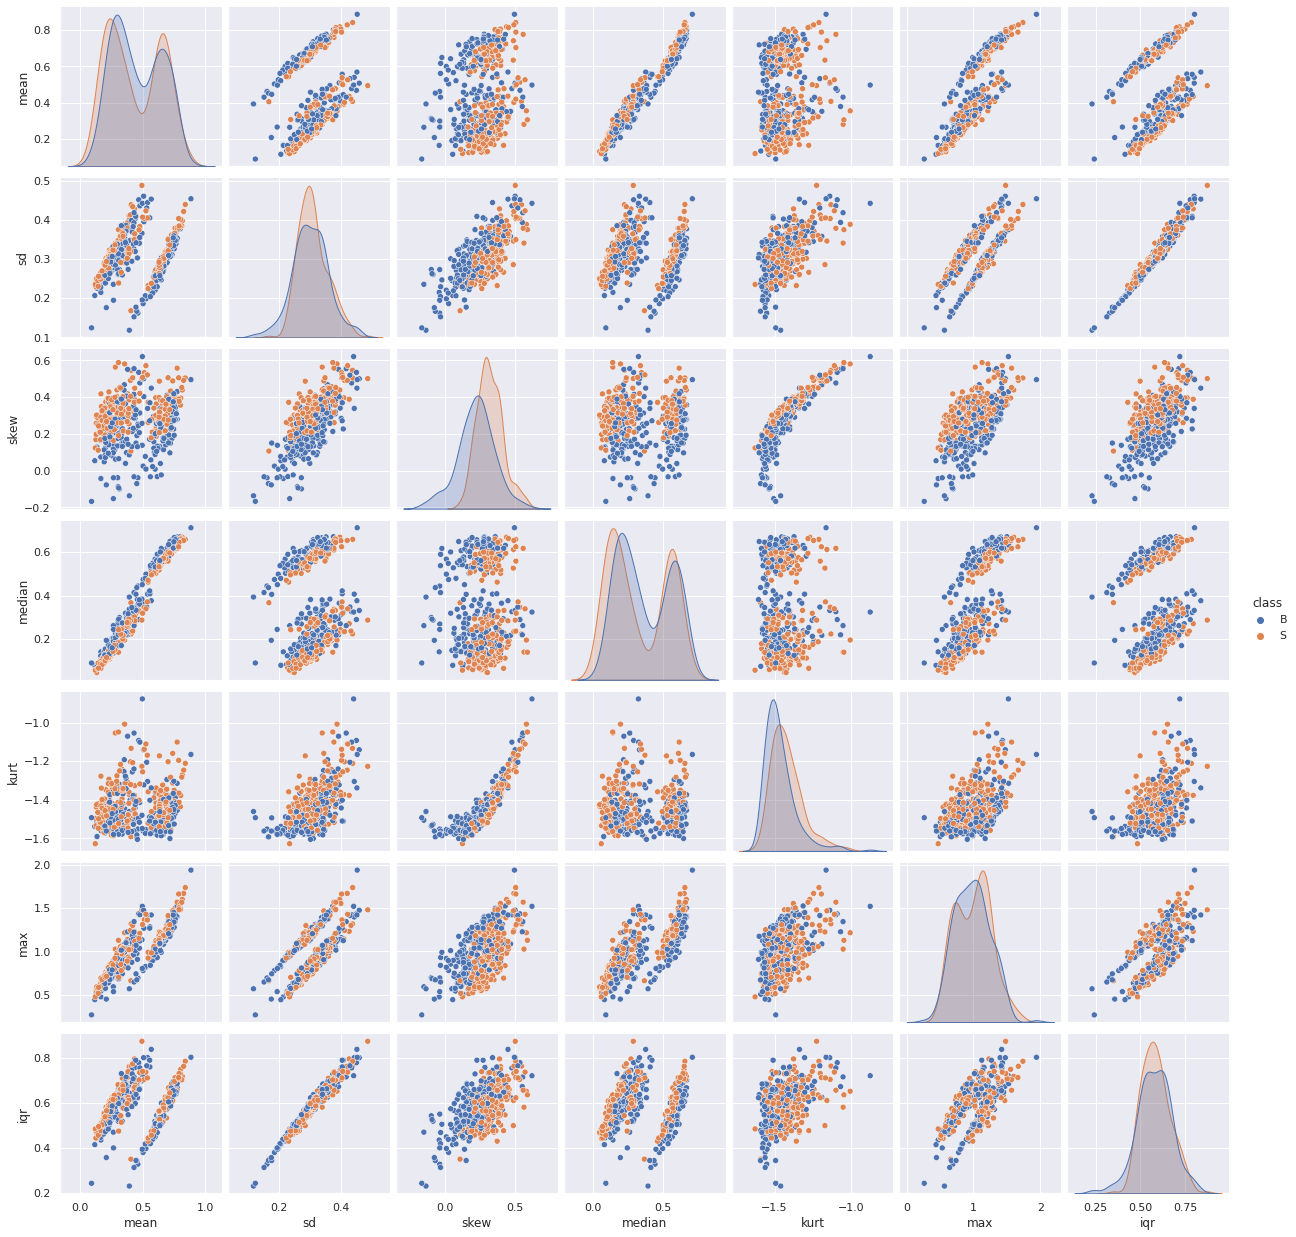

In [27]:
sns.set(font_scale=1)
sns.pairplot(df_inputEng, hue="class")
#df[::10]

---

#### ROC curves

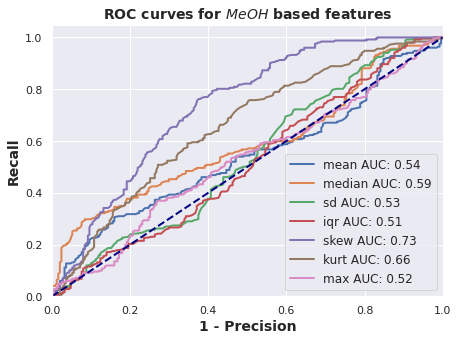

In [24]:
features =['mean', 'median', 'sd', 'iqr', 'skew', 'kurt', 'max' ]
di_h2o =[True, True, False, False, False, False, False] # if one of the features direction is below the 45 degrees, then we make it False
draw_roc (df_inputEng, di_h2o, features, y)

### ML

In [324]:
from sklearn.model_selection import train_test_split
features = df_inputEng.drop(['class'], axis = 1)
labels =  df['Condition']

Xtrain, Xtest, Ytrain, Ytest = train_test_split( features, labels, test_size = 0.33, random_state=3, stratify=labels) # train and valid sets

In [328]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import *

In [326]:
model = RandomForestClassifier(n_jobs = -1)
model.fit(Xtrain, Ytrain)
predictions = model.predict(Xtest)
print("Classification")
print(classification_report(Ytest,predictions))
print("Matrix")
print(confusion_matrix(Ytest,predictions))
accuracy = accuracy_score(Ytest, predictions)
print()
print(accuracy)

Classification
              precision    recall  f1-score   support

           B       0.79      0.69      0.74        83
           S       0.72      0.82      0.77        83

    accuracy                           0.75       166
   macro avg       0.76      0.75      0.75       166
weighted avg       0.76      0.75      0.75       166

Matrix
[[57 26]
 [15 68]]

0.7530120481927711


In [327]:
model = LogisticRegression(n_jobs = -1)
model.fit(Xtrain, Ytrain)
predictions = model.predict(Xtest)
print("Classification")
print(classification_report(Ytest,predictions))
print("Matrix")
print(confusion_matrix(Ytest,predictions))
accuracy = accuracy_score(Ytest, predictions)
print()
print(accuracy)

Classification
              precision    recall  f1-score   support

           B       0.73      0.66      0.70        83
           S       0.69      0.76      0.72        83

    accuracy                           0.71       166
   macro avg       0.71      0.71      0.71       166
weighted avg       0.71      0.71      0.71       166

Matrix
[[55 28]
 [20 63]]

0.7108433734939759


In [332]:
# a support vector classifier
classifier = SVC(C=1,kernel='rbf',gamma=1)
classifier.fit(Xtrain, Ytrain)
predictions = classifier.predict(Xtest)
print("Classification")
print(classification_report(Ytest,predictions))
print("Matrix")
print(confusion_matrix(Ytest,predictions))
accuracy = accuracy_score(Ytest, predictions)
print()
print(accuracy)

Classification
              precision    recall  f1-score   support

           B       0.85      0.63      0.72        83
           S       0.70      0.89      0.79        83

    accuracy                           0.76       166
   macro avg       0.78      0.76      0.75       166
weighted avg       0.78      0.76      0.75       166

Matrix
[[52 31]
 [ 9 74]]

0.7590361445783133


In [352]:
C_range = np.logspace(-1, 10, 20) # define a set of values for the parameter C
gamma_range = np.logspace(-9, 3, 20) # define a set of values for the parameter gamma

svm = SVC(kernel="rbf")
svm_par = dict(gamma=gamma_range, C=C_range)

In [353]:
print(C_range)
print(gamma_range)

[1.00000000e-01 3.79269019e-01 1.43844989e+00 5.45559478e+00
 2.06913808e+01 7.84759970e+01 2.97635144e+02 1.12883789e+03
 4.28133240e+03 1.62377674e+04 6.15848211e+04 2.33572147e+05
 8.85866790e+05 3.35981829e+06 1.27427499e+07 4.83293024e+07
 1.83298071e+08 6.95192796e+08 2.63665090e+09 1.00000000e+10]
[1.00000000e-09 4.28133240e-09 1.83298071e-08 7.84759970e-08
 3.35981829e-07 1.43844989e-06 6.15848211e-06 2.63665090e-05
 1.12883789e-04 4.83293024e-04 2.06913808e-03 8.85866790e-03
 3.79269019e-02 1.62377674e-01 6.95192796e-01 2.97635144e+00
 1.27427499e+01 5.45559478e+01 2.33572147e+02 1.00000000e+03]


In [354]:
from sklearn.model_selection import RandomizedSearchCV

svm_random = RandomizedSearchCV(estimator = svm, param_distributions = svm_par, n_iter = 30, cv = 3, verbose=2, random_state=42, n_jobs = -1)
svm_random.fit(Xtrain, Ytrain)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=30, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-01, 3.79269019e-01, 1.43844989e+00, 5.45559478e+00,
       2.06913808e+01, 7.84759970e+01, 2.97635144e+02, 1.12883789e+03,
       4.28133240e+03, 1.62377674e+04, 6.15848211e+04, 2.33572147e+05,
       8.85866790e+05, 3.35981829e+06, 1.27427499e+07, 4.83293024e+07,
       1.83298071e+08, 6.9...+10]),
                                        'gamma': array([1.00000000e-09, 4.28133240e-09, 1.83298071e-08, 7.84759970e-08,
       3.35981829e-07, 1.43844989e-06, 6.15848211e-06, 2.63665090e-05,
       1.12883789e-04, 4.83293024e-04, 2.06913808e-03, 8.85866790e-03,
       3.79269019e-02, 1.62377674e-01, 6.95192796e-01, 2.97635144e+00,
       1.27427499e+01, 5.45559478e+01, 2.33572147e+02, 1.00000000e+03])},
                   random_state=42, verbose=2)

---

In [355]:
print("the best chosen paramters are: " + str(svm_random.best_params_))

the best chosen paramters are: {'gamma': 0.008858667904100814, 'C': 3359818.286283788}


In [356]:
y_pred2 = svm_random.predict(Xtest)

In [357]:
print("Confusion matrix:\n%s" % confusion_matrix(Ytest, y_pred2))
print("Classification report for classifier : ")
print ( classification_report(Ytest, y_pred2))

Confusion matrix:
[[56 27]
 [ 7 76]]
Classification report for classifier : 
              precision    recall  f1-score   support

           B       0.89      0.67      0.77        83
           S       0.74      0.92      0.82        83

    accuracy                           0.80       166
   macro avg       0.81      0.80      0.79       166
weighted avg       0.81      0.80      0.79       166



### log Transformation

In [25]:
df_inputEng_log = pd.DataFrame() # define a new dataframe
df_inputEng_log['mean'] = df_input_log.mean(axis=1)
df_inputEng_log['sd'] = df_input_log.std(axis=1)
df_inputEng_log['skew'] = df_input_log.skew(axis=1)
df_inputEng_log['median'] = df_input_log.median(axis=1)
df_inputEng_log['kurt'] = df_inputEng_log.kurt(axis=1)
df_inputEng_log['min'] = df_inputEng_log.min(axis=1)
df_inputEng_log['max'] = df_inputEng_log.max(axis=1)



Q1 = df_input_log.quantile(0.25, 1)
Q3 = df_input_log.quantile(0.75,1 )
df_inputEng_log['iqr'] = Q3 - Q1

df_inputEng_log['class'] = df['Condition']


In [26]:
print(df_inputEng_log)

         mean        sd      skew    median      kurt       min       max  \
0    0.254029  0.248482  0.016791  0.218436  3.588714  0.016791  3.588714   
1    0.135017  0.188652 -0.173147  0.133101  3.574946 -0.173147  3.574946   
2    0.219374  0.256453  0.105436  0.164385 -1.408488 -1.408488  0.256453   
3    0.193067  0.233800  0.034241  0.154959  1.585294  0.034241  1.585294   
4    0.130274  0.207076  0.018505  0.099613  0.751394  0.018505  0.751394   
..        ...       ...       ...       ...       ...       ...       ...   
498  0.294874  0.218341  0.128631  0.244251  1.220048  0.128631  1.220048   
499  0.251318  0.182563  0.067147  0.218170  1.775650  0.067147  1.775650   
500  0.178339  0.147985 -0.176904  0.178335  3.856300 -0.176904  3.856300   
501  0.385942  0.267562  0.362693  0.292229 -4.293821 -4.293821  0.385942   
502  0.369459  0.263661  0.325973  0.276935 -2.124791 -2.124791  0.369459   

          iqr class  
0    0.480649     B  
1    0.375477     B  
2    0.50

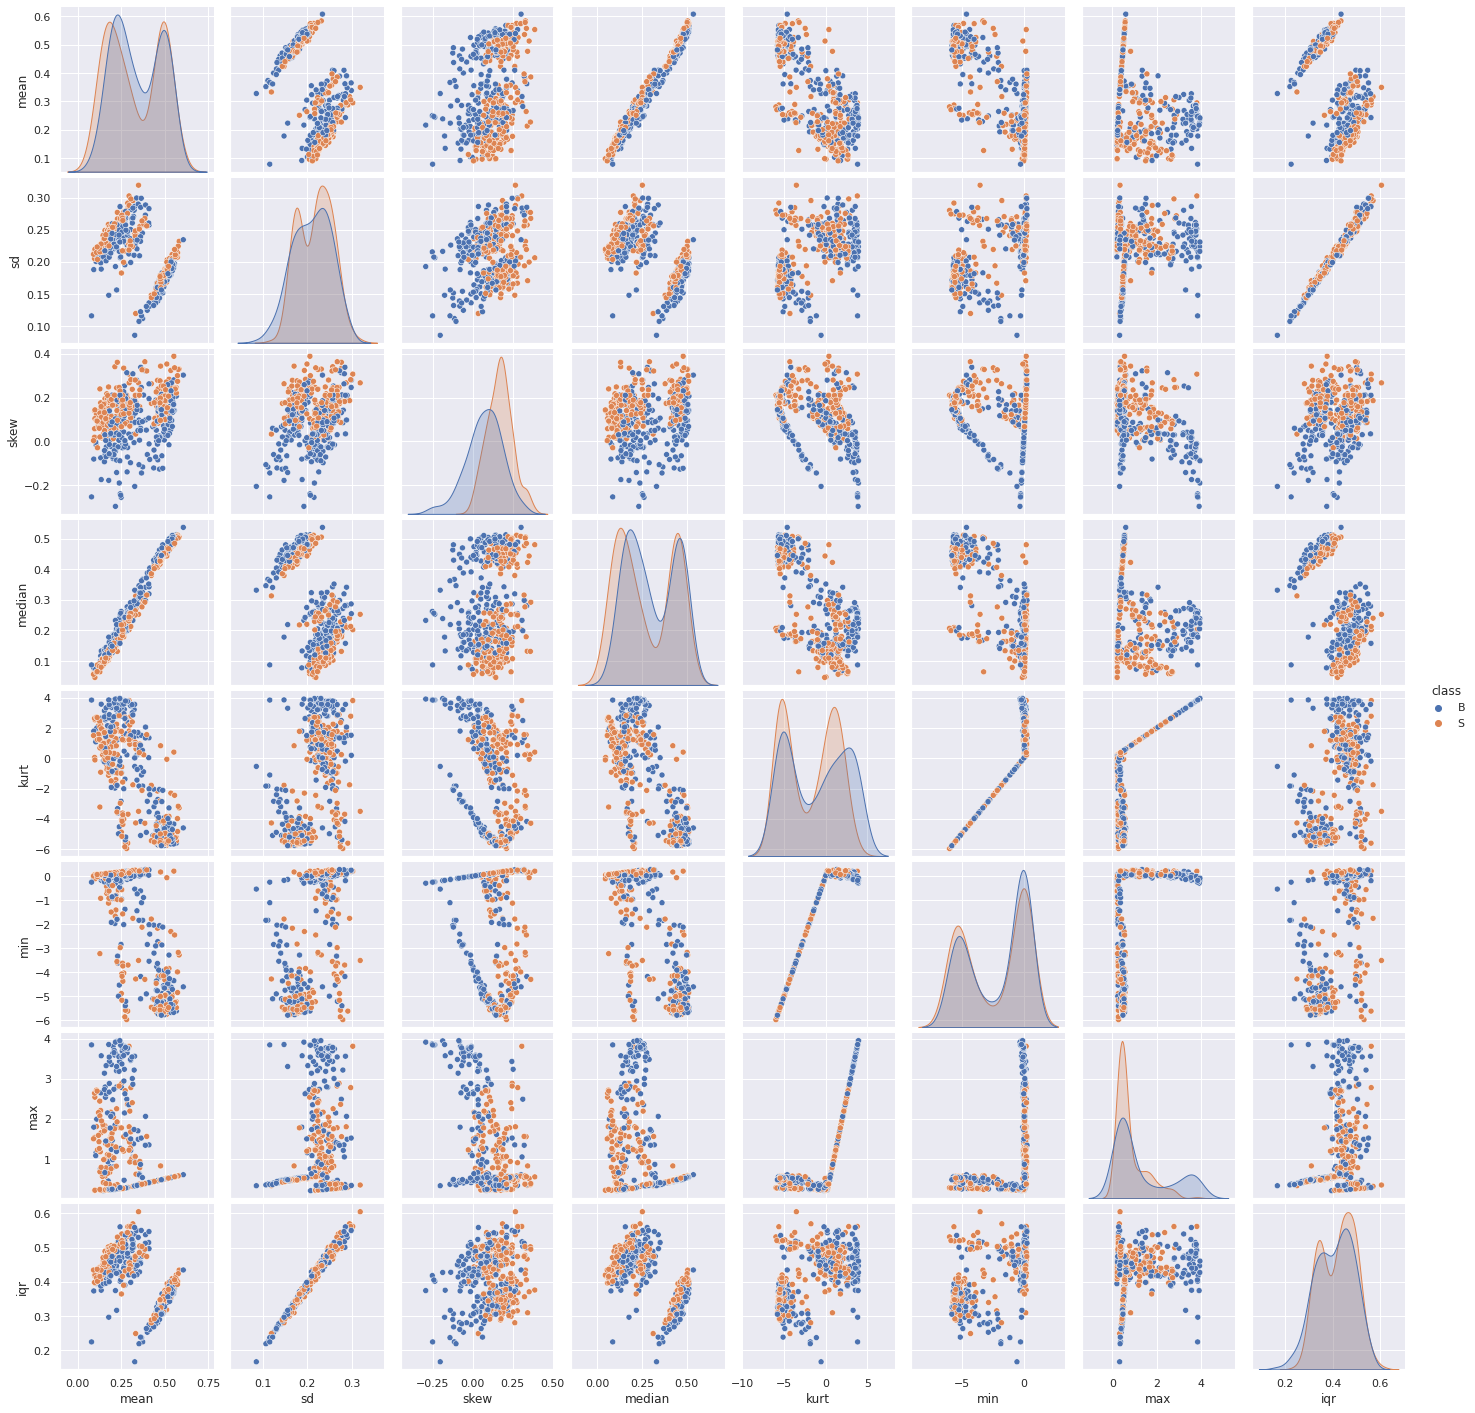

In [27]:
sns.set(font_scale=1)
sns.pairplot(df_inputEng_log, hue="class")

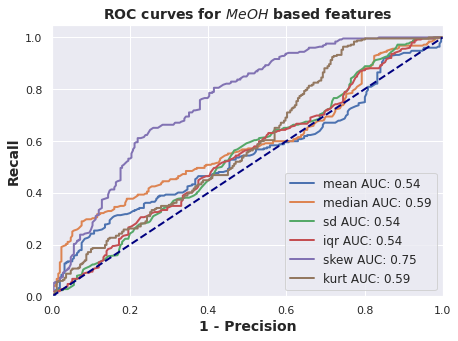

In [28]:
features =['mean', 'median', 'sd', 'iqr', 'skew', 'kurt' ]
di_h2o =[True, True, False, False, False, True] # if one of the features direction is below the 45 degrees, then we make it False
draw_roc (df_inputEng_log, di_h2o, features, y)

### sqrt Transformation

In [29]:
df_inputEng_sqrt = pd.DataFrame() # define a new dataframe
df_inputEng_sqrt['mean'] = df_input_sqrt.mean(axis=1)
df_inputEng_sqrt['sd'] = df_input_sqrt.std(axis=1)
df_inputEng_sqrt['skew'] = df_input_sqrt.skew(axis=1)
df_inputEng_sqrt['median'] = df_input_sqrt.median(axis=1)
df_inputEng_sqrt['kurt'] = df_inputEng_sqrt.kurt(axis=1)

Q1 = df_input_sqrt.quantile(0.25, 1)
Q3 = df_input_sqrt.quantile(0.75,1 )
df_inputEng_sqrt['iqr'] = Q3 - Q1

df_inputEng_sqrt['class'] = df['Condition']

In [30]:
print(df_inputEng_sqrt)

         mean        sd      skew    median      kurt       iqr class
0    1.144215  0.141888  0.106762  1.115405 -5.969442  0.274065     B
1    1.074576  0.100367 -0.106573  1.068815 -5.461111  0.201775     B
2    1.125158  0.144771  0.192051  1.085665 -5.935441  0.281689     S
3    1.108891  0.129534  0.113602  1.080560 -5.983285  0.255544     S
4    1.073034  0.110976  0.092433  1.051068 -5.986572  0.218334     B
..        ...       ...       ...       ...       ...       ...   ...
498  1.165805  0.127849  0.198724  1.129896 -5.902922  0.254914     S
499  1.138631  0.104081  0.129613  1.115257 -5.982405  0.207718     S
500  1.096246  0.080499 -0.126439  1.093264 -5.500792  0.162574     B
501  1.223898  0.167192  0.465450  1.157328 -4.351945  0.301295     S
502  1.213514  0.162876  0.416208  1.148512 -4.803468  0.304324     S

[503 rows x 7 columns]


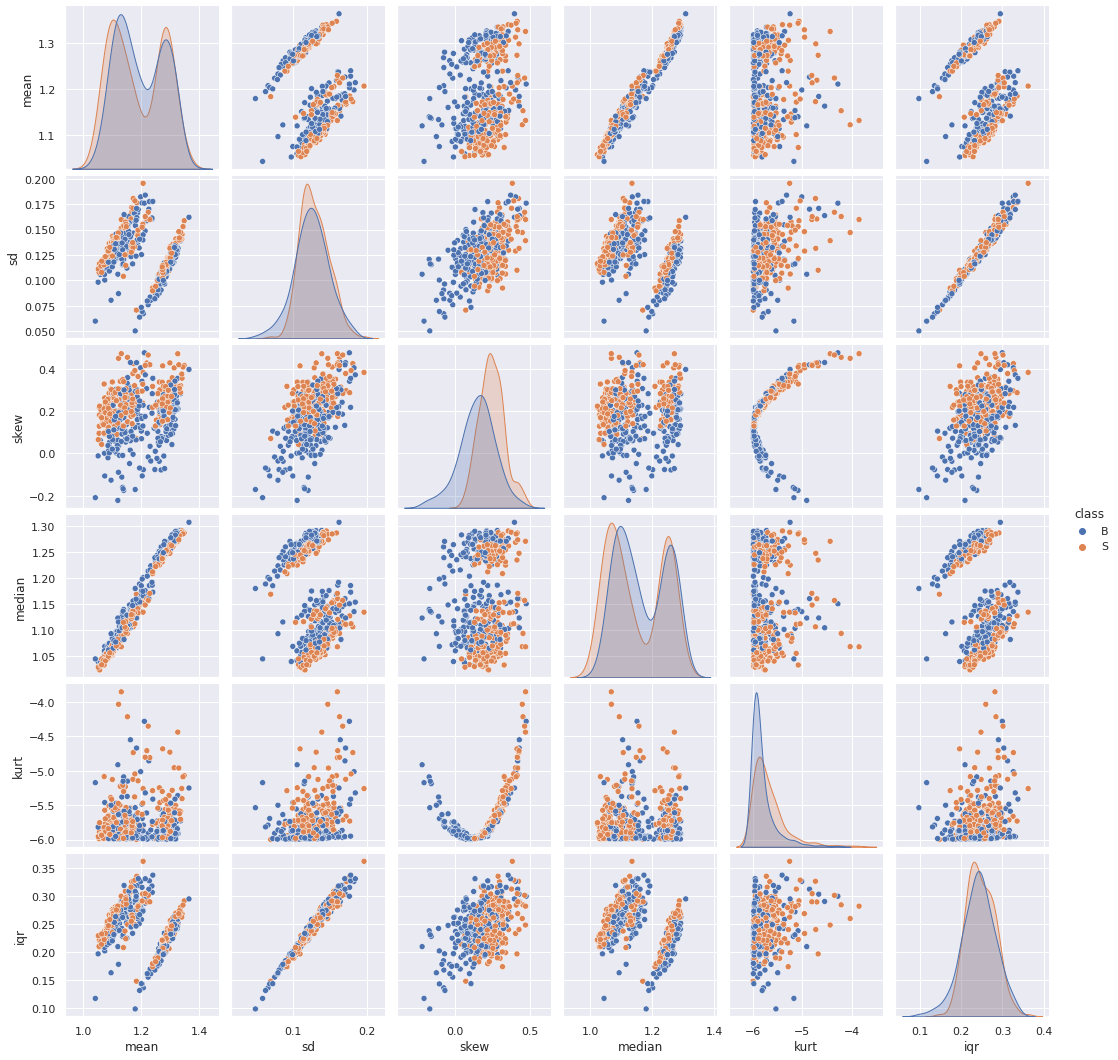

In [31]:
sns.set(font_scale=1)
sns.pairplot(df_inputEng_sqrt, hue="class")

### ROC curves

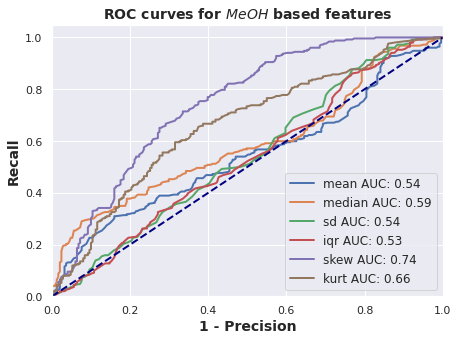

In [32]:
features =['mean', 'median', 'sd', 'iqr', 'skew', 'kurt' ]
di_h2o =[True, True, False, False, False, False] # if one of the features direction is below the 45 degrees, then we make it False
draw_roc (df_inputEng_sqrt, di_h2o, features, y)

### What more can we do ??? ? ??? ? ? ? ?? 

fit GMMs to the peakes 

# Testing for stationarity 

In [34]:
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
data = yf.download("GOOGL", start="2019-01-02", end="2020-04-30")[['Close']]
data.index = pd.to_datetime(data.index)
data.head().round(2)

[*********************100%***********************]  1 of 1 completed


Close
Date               
2019-01-02  1054.68
2019-01-03  1025.47
2019-01-04  1078.07
2019-01-07  1075.92
2019-01-08  1085.37

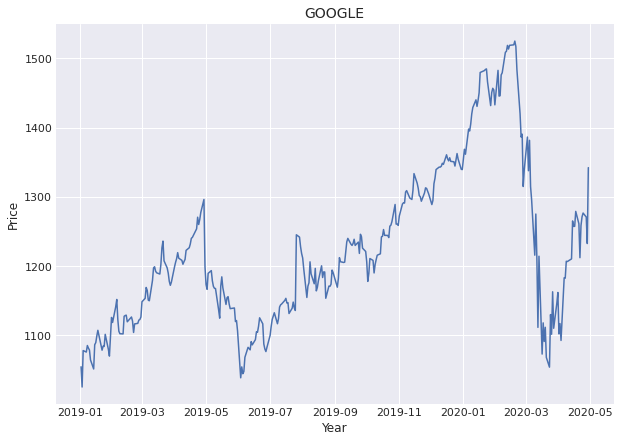

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Plot the time series
plt.figure(figsize=(10, 7))
plt.plot(data['Close'])
plt.title('GOOGLE', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

##### Statistical Tests

A number of parametric and nonparametric tests are available to check for the stationarity of the series. Let's have a look at a couple of parametric tests using Python.

* _Augmented Dickey-Fuller Test_ - The Augmented Dickey-Fuller test is one of the most popular tests to check for stationarity. It tests the below hypothesis.
* Null Hypothesis, H0: The time series is not stationary.
* Alternative Hypothesis, H1: The time series is stationary.

* If the p-value is less than or equal to 0.05, you reject H0 and conclude that the time series is stationary.
* If the p-value is greater than 0.05, you fail to reject H0 and conclude that the time series is not stationary.

In [36]:


result = adfuller(data.Close)
print(result)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

(-2.3065899720568086, 0.1698513825552302, 9, 324, {'1%': -3.450695263332383, '5%': -2.87050218926466, '10%': -2.5715449066453284}, 2898.216008352776)
ADF Test Statistic: -2.31
5% Critical Value: -2.87
p-value: 0.17


The p-value is greater than 0.05. You fail to reject the null hypothesis and conclude that the time series is not stationary.

##### now let us go to our Apple data

In [37]:
for t in range (10):
    i = rand[t]
    lineSpec =  np.array(df_input.iloc[i]).flatten()
    result = adfuller(lineSpec)
    print(target[i])
    print('ADF Test Statistic: %.2f' % result[0])
    print('5%% Critical Value: %.2f' % result[4]['5%'])
    print('p-value: %.2f' % result[1])
    print("-----------------------")

S
ADF Test Statistic: -1.46
5% Critical Value: -2.86
p-value: 0.55
-----------------------
B
ADF Test Statistic: 0.01
5% Critical Value: -2.86
p-value: 0.96
-----------------------
S
ADF Test Statistic: -0.56
5% Critical Value: -2.86
p-value: 0.88
-----------------------
S
ADF Test Statistic: 0.20
5% Critical Value: -2.86
p-value: 0.97
-----------------------
B
ADF Test Statistic: -0.82
5% Critical Value: -2.86
p-value: 0.81
-----------------------
S
ADF Test Statistic: -1.66
5% Critical Value: -2.86
p-value: 0.45
-----------------------
B
ADF Test Statistic: -1.30
5% Critical Value: -2.86
p-value: 0.63
-----------------------
B
ADF Test Statistic: -0.35
5% Critical Value: -2.86
p-value: 0.92
-----------------------
B
ADF Test Statistic: -0.56
5% Critical Value: -2.86
p-value: 0.88
-----------------------
B
ADF Test Statistic: -0.68
5% Critical Value: -2.86
p-value: 0.85
-----------------------


The p-value is greater than 0.05. You fail to reject the null hypothesis and conclude that the time series is not stationary.

### converting the data into stationary

In [29]:
shift = 50
df_input_shifted = (df_input - df_input.shift(shift, axis="columns")).dropna( axis="columns")

In [30]:
df_input_shifted

11802.640  11798.780  11794.920  11791.070  11787.210  11783.350  \
0     0.006638   0.006489   0.006648   0.006841   0.007210   0.007341   
1     0.007860   0.007137   0.006678   0.006752   0.007369   0.007527   
2     0.006993   0.006404   0.006434   0.006702   0.006943   0.006841   
3     0.005901   0.005630   0.006017   0.006344   0.006207   0.005746   
4     0.006001   0.005375   0.005046   0.005207   0.005844   0.006013   
..         ...        ...        ...        ...        ...        ...   
498   0.005275   0.005660   0.006458   0.006464   0.005519   0.005542   
499   0.003708   0.003741   0.004205   0.004126   0.003955   0.004962   
500   0.005286   0.006371   0.006691   0.005966   0.005587   0.006264   
501   0.003574   0.004881   0.005168   0.004437   0.004202   0.005553   
502   0.006083   0.006238   0.005826   0.003923   0.002716   0.003994   

     11779.500  11775.640  11771.780  11767.920  ...  4034.497   4030.640   \
0     0.006891   0.006556   0.007018   0.007435  ...   0.048118   0.051949   
1     0.006768   0.005959   0.006032   0.006554  ...   0.014544   0.016965   
2     0.006708   0.006821   0.007098   0.007372  ...   0.044296   0.042974   
3     0.005468   0.005609   0.005904   0.005895  ...   0.037161   0.037127   
4     0.005458   0.005186   0.005498   0.005644  ...   0.033509   0.034718   
..         ...        ...        ...        ...  ...        ...        ...   
498   0.006900   0.007311   0.006061   0.004558  ...   0.031619   0.031597   
499   0.006080   0.005917   0.005365   0.004854  ...   0.020928   0.015878   
500   0.007058   0.006795   0.005728   0.004909  ...   0.002911   0.003514   
501   0.007384   0.008064   0.007400   0.005977  ...   0.150946   0.160700   
502   0.006148   0.007068   0.006655   0.005291  ...   0.095835   0.107421   

     4026.783   4022.926   4019.069   4015.211   4011.354   4007.497   \
0     0.050055   0.043791   0.042305   0.046912   0.050601   0.044410   
1     0.018504   0.016200   0.010983   0.006548   0.004551   0.003139   
2     0.039822   0.036808   0.037630   0.040353   0.043259   0.041408   
3     0.040622   0.044130   0.041984   0.035464   0.028604   0.026269   
4     0.032754   0.029025   0.028915   0.033090   0.037991   0.040064   
..         ...        ...        ...        ...        ...        ...   
498   0.036418   0.035158   0.028257   0.020670   0.017208   0.017094   
499   0.014950   0.018441   0.022645   0.023350   0.020107   0.019055   
500   0.007741   0.008903   0.005617   0.004465   0.004887   0.003488   
501   0.184277   0.198713   0.207925   0.211685   0.182368   0.141089   
502   0.108123   0.096766   0.094870   0.108055   0.118214   0.111732   

     4003.640   3999.783   
0     0.031288   0.024400  
1     0.002780   0.004648  
2     0.026996   0.009378  
3     0.030536   0.037507  
4     0.039055   0.036150  
..         ...        ...  
498   0.017099   0.023086  
499   0.024666   0.031130  
500   0.004411   0.008015  
501   0.121960   0.094626  
502   0.092289   0.076134  

[503 rows x 2024 columns]

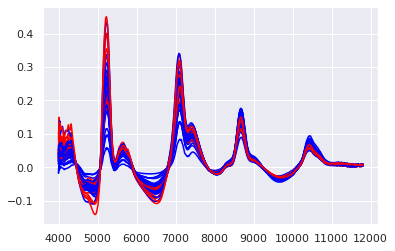

In [31]:
for t in range (50):
    i = rand[t]
    lineSpec =  df_input_shifted.iloc[i]
    # print(len(lineSpec))
    if target[i] == 'S':
        plt.plot(np.array(df_input.columns[shift:]), lineSpec, color = 'red')
    if target[i] == 'B':
        plt.plot(np.array(df_input.columns[shift:]), lineSpec, color = 'blue')
    # print("-----------------------")

### Now enginner features

In [32]:
df_inputEng_shifted = pd.DataFrame() # define a new dataframe
df_inputEng_shifted['mean'] = df_input_shifted.mean(axis=1)
df_inputEng_shifted['sd'] = df_input_shifted.std(axis=1)
df_inputEng_shifted['skew'] = df_input_shifted.skew(axis=1)
df_inputEng_shifted['median'] = df_input_shifted.median(axis=1)
Q1 = df_input_shifted.quantile(0.25, 1)
Q3 = df_input_shifted.quantile(0.75,1 )
df_inputEng_shifted['iqr'] = Q3 - Q1
df_inputEng_shifted['kurt'] = df_input_shifted.kurt(axis=1)
df_inputEng_shifted['max'] = df_input_shifted.max(axis=1)
df_inputEng_shifted['min'] = df_input_shifted.min(axis=1)






In [33]:
import pandas as pd
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df_inputEng_shifted)

df_inputEng_shifted = pd.DataFrame(x_scaled, columns = df_inputEng_shifted.columns)
df_inputEng_shifted['class'] = df['Condition']


In [34]:
df_inputEng_shifted


mean        sd      skew    median       iqr      kurt       max  \
0    0.563218  0.377062  0.258262  0.774137  0.613969  0.194182  0.261006   
1    0.247320  0.141423  0.022095  0.495750  0.263913  0.007355  0.080270   
2    0.554481  0.422199  0.448423  0.640109  0.588807  0.337315  0.320155   
3    0.449817  0.311248  0.268261  0.651046  0.487476  0.198835  0.229931   
4    0.331452  0.229635  0.149630  0.516060  0.362932  0.145474  0.158379   
..        ...       ...       ...       ...       ...       ...       ...   
498  0.458678  0.377184  0.587612  0.474830  0.456597  0.423074  0.296434   
499  0.309960  0.241517  0.481442  0.411741  0.302605  0.342310  0.192754   
500  0.138683  0.072401  0.130546  0.123148  0.116434  0.050900  0.045961   
501  0.846678  0.860370  0.960712  0.571422  0.702474  0.783068  0.792630   
502  0.749080  0.777545  0.920577  0.537222  0.670906  0.716596  0.680530   

          min class  
0    0.785739     B  
1    0.943828     B  
2    0.730285     S  
3    0.815155     S  
4    0.863101     B  
..        ...   ...  
498  0.773086     S  
499  0.859419     S  
500  0.976918     B  
501  0.424537     S  
502  0.512821     S  

[503 rows x 9 columns]

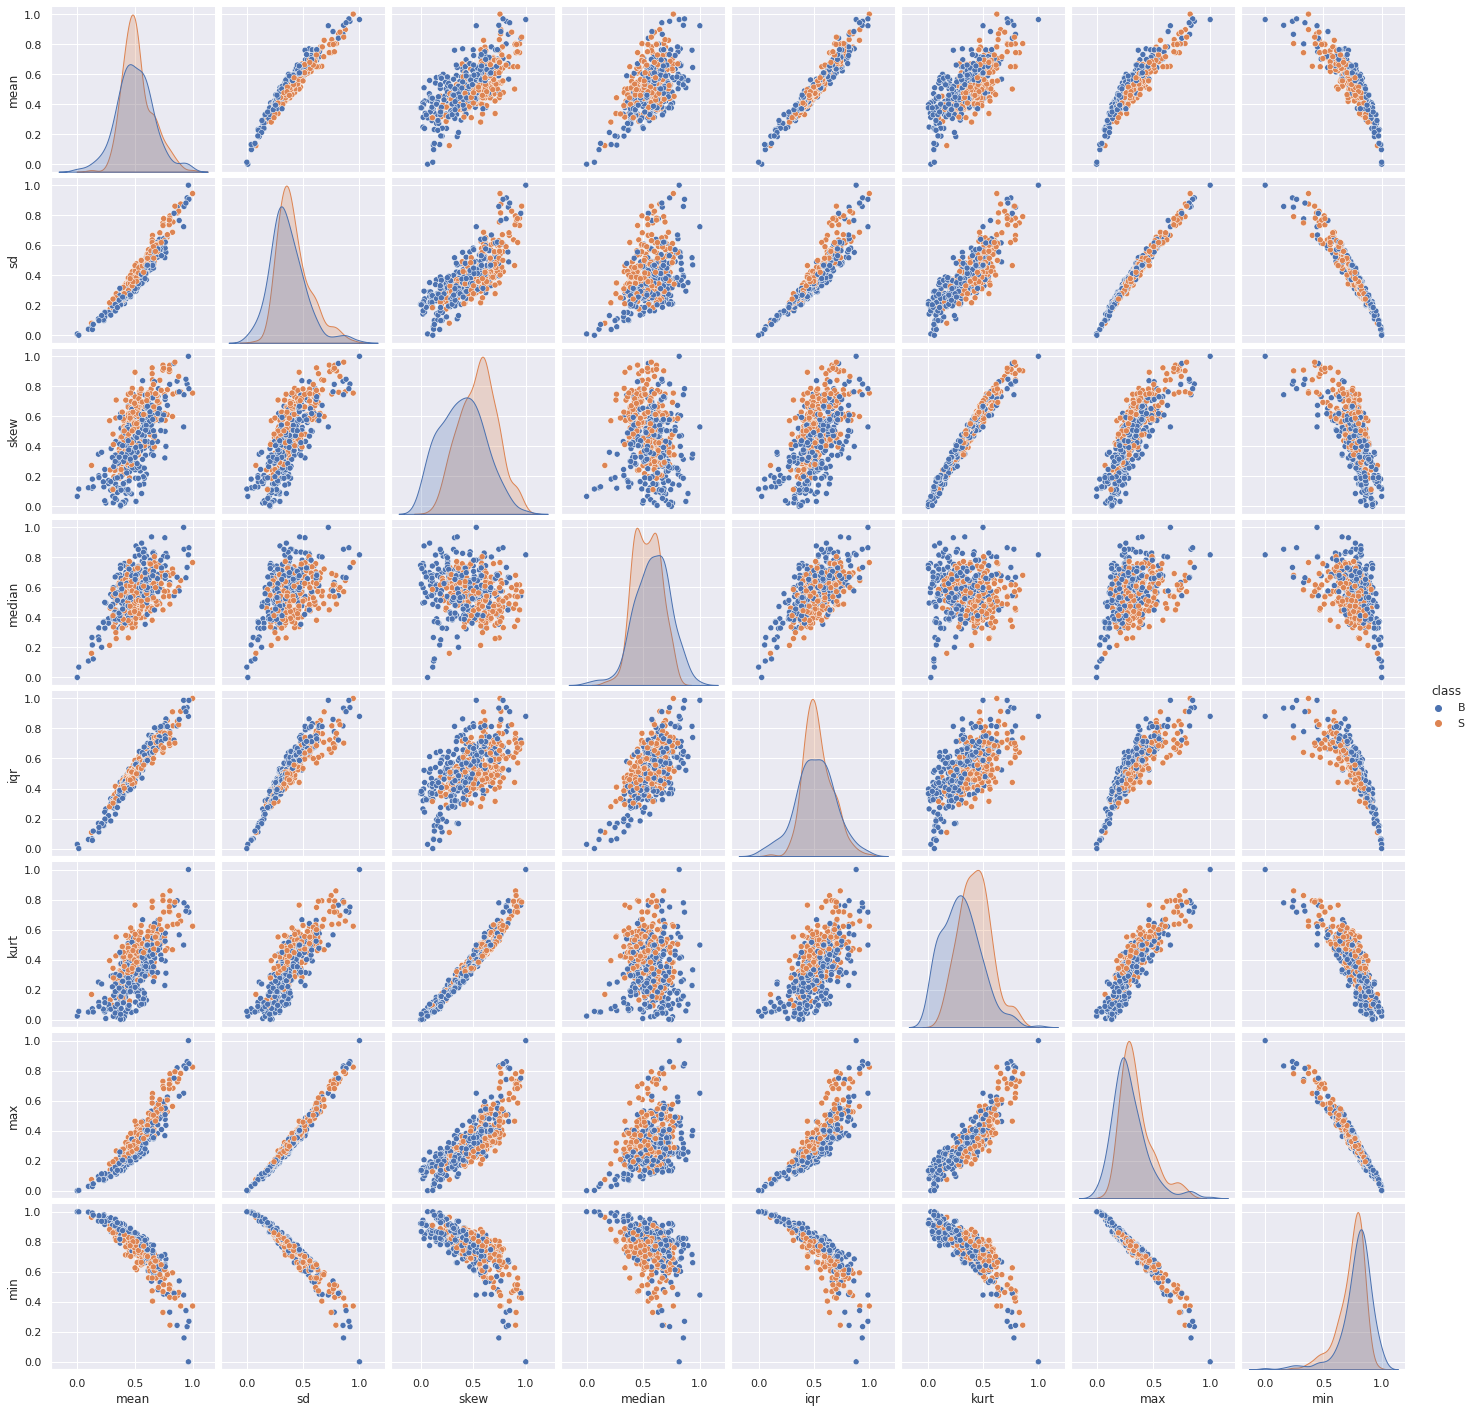

In [35]:
sns.set(font_scale=1)
sns.pairplot(df_inputEng_shifted, hue="class")

#### ROC

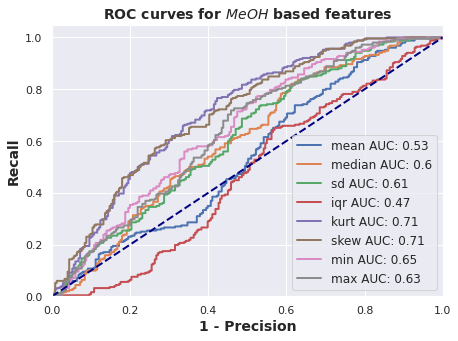

In [36]:
features =['mean', 'median', 'sd', 'iqr', 'kurt','skew', 'min', 'max' ]
di =      [False,    True,   False, True, False, False, True, False] # if one of the features direction is below the 45 degrees, then we make it False
draw_roc (df_inputEng_shifted, di, features, y)

----

In [37]:
print(1)

1


In [162]:
#### more features

In [163]:
from cesium import featurize as ft


In [166]:
features_to_use = ["amplitude",
                   "percent_beyond_1_std",
                   "percent_close_to_median",
                  "skew",
                  "max_slope"]
fset_cesium = ft.featurize_time_series(times=None,
                                              values=df_input_shifted.values,
                                              errors=None,
                                              features_to_use=features_to_use,
                                             scheduler = None)

In [167]:
np.arange(0, len(df_input_shifted.columns))

array([   0,    1,    2, ..., 2047, 2048, 2049])

In [168]:
df_eng2 = pd.DataFrame(np.array(fset_cesium).flatten().reshape(503,5) , columns = features_to_use)


In [169]:
x_scaled = min_max_scaler.fit_transform(df_eng2)

df_eng2 = pd.DataFrame(x_scaled, columns = df_eng2.columns)
df_eng2['class'] = df['Condition']

df_eng2


amplitude  percent_beyond_1_std  percent_close_to_median      skew  \
0     0.000689              0.000007                 0.000534  0.000572   
1     0.000927              0.000630                 0.000626  0.000897   
2     0.000710              0.000620                 0.000384  0.000926   
3     0.001379              0.001426                 0.000277  0.000351   
4     0.000607              0.000161                 0.000396  0.000627   
..         ...                   ...                      ...       ...   
498   0.457145              0.291147                 0.343177  0.540536   
499   0.411938              0.266669                 0.294006  0.301273   
500   0.430427              0.263762                 0.306869  0.755247   
501   0.455606              0.136900                 0.266078  0.460907   
502   0.178737              0.109647                 0.061968  1.000000   

     max_slope class  
0     0.000415     B  
1     0.000782     B  
2     0.000954     S  
3     0.000693     S  
4     0.001491     B  
..         ...   ...  
498   0.284115     S  
499   0.150139     S  
500   1.000000     B  
501   0.659385     S  
502   0.407548     S  

[503 rows x 6 columns]

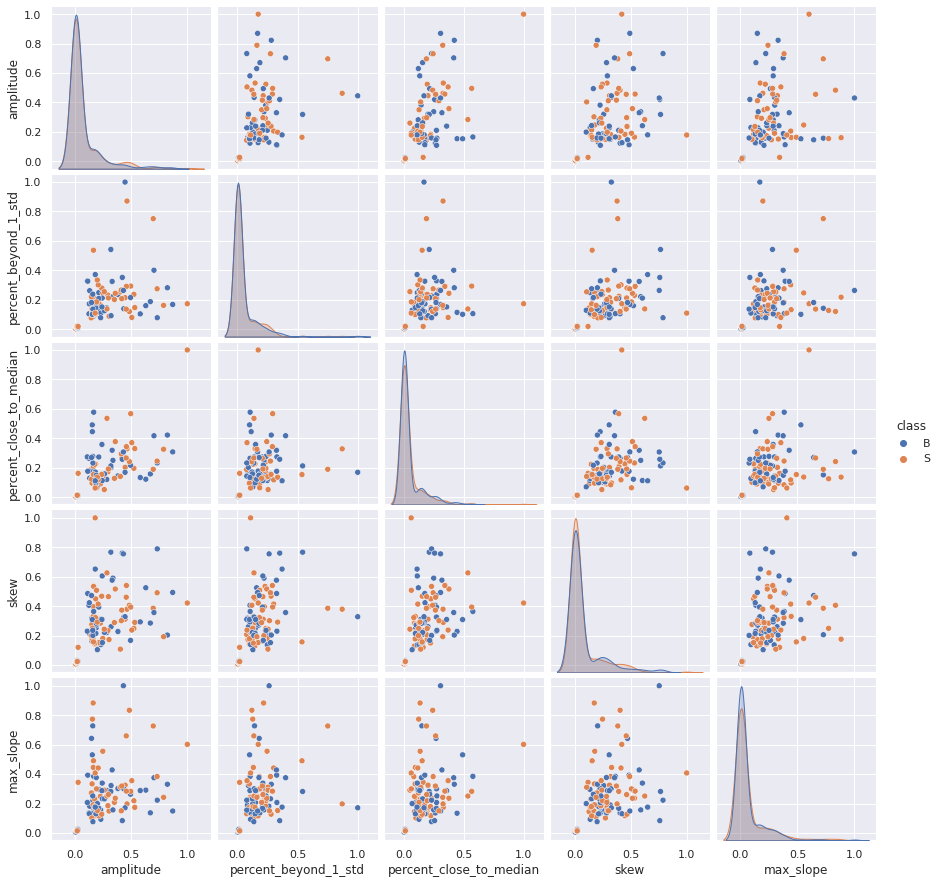

In [170]:
sns.set(font_scale=1)
sns.pairplot(df_eng2, hue="class")

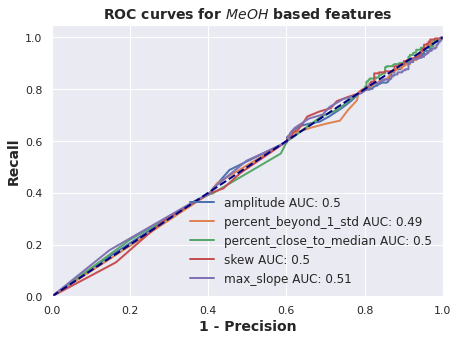

In [171]:
di =[True, True, True, True, True] # if one of the features direction is below the 45 degrees, then we make it False
draw_roc (df_eng2, di, features_to_use, y)

In [1]:
# -*- coding: utf-8 -*-

df = pd.read_excel('Detect-GS.xlsx')

wavenumbers = df.columns[4:]
type(wavenumbers)

# Make all wavenumbers float types
wavenum = []
for numbers in wavenumbers:
   float(numbers)
   wavenum.append(numbers)

# calculate wavelengths from wavenumbers
wavelengths=[] 
for waven in wavenum:
  waveln = (1/waven)*10**7
  wavelengths.append("{:.2f}".format(waveln))

type(wavelengths)
len(wavelengths)

NameError: name 'pd' is not defined